### Regression Modeling Exercise
**Corey Solitaire**

**10/01/2020**

<div class="alert alert-block alert-success"></div>

# Imports:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Models
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings("ignore")

import wrangle
import features

<div class="alert alert-block alert-success"></div>

# Exercises:

Using the data on **swiss data** complete the following:

In [2]:
url = "https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/swiss.csv"
df = pd.read_csv(url, index_col=0)
df.rename(columns={'Fertility':'fertility', 'Agriculture':'agriculture', 'Examination':'examination', 'Education':'education','Catholic':'catholic','Infant.Mortality':'infant_mortality'}, inplace =True)

(array([ 1.,  2.,  0.,  4.,  3., 13.,  7.,  8.,  5.,  4.]),
 array([35.  , 40.75, 46.5 , 52.25, 58.  , 63.75, 69.5 , 75.25, 81.  ,
        86.75, 92.5 ]),
 <a list of 10 Patch objects>)

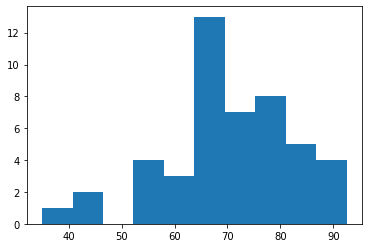

In [3]:
#Visualize Target
plt.hist(df.fertility)

In [4]:
df.shape

(47, 6)

In [5]:
df.head(1)

,fertility,agriculture,examination,education,catholic,infant_mortality
Courtelary,80.2,17.0,15,12,9.96,22.2


## 1. Split the data into train, validate, and test datasets.

In [6]:
# split dataset
train_validate, test = train_test_split(df, test_size = .2, random_state = 123)
train, validate = train_test_split(train_validate, test_size = .3, random_state = 123)
train.shape, validate.shape, test.shape

# Assign variables
# x df's are all numeric cols except tip
X_train = train.drop(columns=['fertility'])
X_validate = validate.drop(columns=['fertility'])
X_test = test.drop(columns=['fertility'])

# y df's are just fertility
y_train = train[['fertility']]
y_validate = validate[['fertility']]
y_test = test[['fertility']]

scaler = MinMaxScaler(copy=True).fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_validate_scaled = scaler.transform(X_validate)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, 
                              columns=X_train.columns.values).\
                            set_index([X_train.index.values])

X_validate_scaled = pd.DataFrame(X_validate_scaled, 
                                columns=X_validate.columns.values).\
                            set_index([X_validate.index.values])

X_test_scaled = pd.DataFrame(X_test_scaled, 
                                columns=X_test.columns.values).\
                            set_index([X_test.index.values])

# Create a Baseline:

In [7]:
np.mean(y_train)

fertility    71.536
dtype: float64

In [8]:
y_train.shape

(25, 1)

In [9]:
# encode as variable
# np.full modiefies shape turns value in to a full series object

baseline_rmse = mean_squared_error(y_train, np.full(25, np.mean(y_train)))**1/2
baseline_rmse  # Model to beat 48% Fertility Rate 

47.762752000000006

## 2. Create a model (LinearRegression)

#### Train

In [10]:
# Make Model
lm = LinearRegression(normalize=True)
# Fit Model
lm.fit(X_train_scaled, y_train)
# Make Predictions
lm_pred = lm.predict(X_train_scaled)
# Compute root mean squared error
lm_rmse = mean_squared_error(y_train, lm_pred)**(1/2)
lm_rmse

4.571043042889271

#### Validate

In [11]:
# Make Predictions
lm_pred_v = lm.predict(X_validate_scaled)
# Compute root mean squared error
lm_rmse_v = mean_squared_error(y_validate, lm_pred_v)**(1/2)
lm_rmse_v

12.132738217927692

***

**Takeaway**
- Validate is much worse then Train, Model most likely over fit

***

## 3. Create a model (LassoLars)

#### Train

In [19]:
# Make a model
lars = LassoLars(alpha=1)
# Fit a model
lars.fit(X_train_scaled, y_train)
# Make Predictions
lars_pred = lars.predict(X_train_scaled)
# Computer root mean squared error
lars_rmse = mean_squared_error(y_train, lars_pred)**(1/2)
lars_rmse

8.900787755452747

#### Validate

In [20]:
# Make predictions
lars_pred_v = lars.predict(X_validate_scaled)
# Compute root mean squared error
lars_rmse_v = mean_squared_error(y_validate, lars_pred_v)**(1/2)
lars_rmse_v

14.583862842774934

***

**Takeaway**
- Validate is much worse then Train, Model most likely over fit

***

## 4. Create a model (Polynomial Features)

#### Train

In [14]:
# Make a model
pf = PolynomialFeatures(degree=2)

# Fit and Transform model
# to get a new set of features..which are the original features sqauared
X_train_squared = pf.fit_transform(X_train_scaled)
X_validate_squared = pf.transform(X_validate_scaled)

# Feed new features in to linear model. 
lm_squared = LinearRegression()
lm_squared.fit(X_train_squared, y_train)
# Make predictions
lm_squared_pred = lm_squared.predict(X_train_squared)
# Compute root mean squared error
lm_squared_rmse = mean_squared_error(y_train, lm_squared_pred)**(1/2)
lm_squared_rmse

2.58939426066832

#### Validate

In [15]:
# Make predictions
lm_squared_pred_v = lm_squared.predict(X_validate_squared)
# Compute root mean squared error
lm_squared_rmse_v = mean_squared_error(y_validate, lm_squared_pred_v)**(1/2)
lm_squared_rmse_v

26.657466827351612

***

**Takeaway**
- Validate is much worse then Train, Model most likely over fit

***

## 5. Create model(TweedieRegressor)

#### Train

In [16]:
# Make Model
tw = TweedieRegressor(power=0, alpha=0.1) # 0 = normal distribution
# Fit Model
tw.fit(X_train_scaled, y_train)
# Make Predictions
tw_pred = tw.predict(X_train_scaled)
# Compute root mean squared error
tw_rmse = mean_squared_error(y_train, tw_pred)**(1/2)
tw_rmse

6.454876751209331

#### Validate

In [17]:
# Make predictions
tw_pred_v = tw.predict(X_validate_scaled)
# Compute root mean squared error
tw_rmse_v = mean_squared_error(y_validate, tw_pred_v)**(1/2)
tw_rmse_v

13.234925723967551

***

**Takeaway**
- Validate is much worse then Train, Model most likely over fit

***

#### Test

In [22]:
# Make Predictions (On best Model)
lm_pred_test = lm.predict(X_test_scaled)
# Compute root mean squared error
lm_rmse_test = mean_squared_error(y_test, lm_pred_test)**(1/2)
lm_rmse_test

10.67992101123686



***

**Takeaway**
- Model does not beat baseline, back to the drawing board....

***
